In [1]:
import pandas as pd

csv = pd.read_csv(r"RigolDS2.csv")
csv

,Time(s),CH1(V),CH2(V),CH3(V),CH4(V)
0,-0.005,-0.008606,-0.000860,-0.014359,-0.001765
1,-0.005,-0.008606,0.000430,-0.015860,-0.001765
2,-0.005,-0.009466,0.000430,-0.014574,0.000000
3,-0.005,-0.009896,-0.000430,-0.015002,-0.001324
4,-0.005,-0.009466,-0.000430,-0.014359,-0.001324
...,...,...,...,...,...
999995,0.005,0.001291,0.000000,-0.001929,-0.000441
999996,0.005,-0.000861,0.001290,-0.004286,-0.000441
999997,0.005,0.001721,-0.002149,-0.002358,-0.002207
999998,0.005,0.000000,0.003439,-0.002786,-0.000441


In [2]:
import numpy as np

data = csv.to_numpy()
data

array([[-0.005     , -0.0086056 , -0.00085976, -0.01435944, -0.00176528],
       [-0.005     , -0.0086056 ,  0.00042988, -0.01585968, -0.00176528],
       [-0.005     , -0.00946616,  0.00042988, -0.01457376,  0.        ],
       ...,
       [ 0.005     ,  0.00172112, -0.0021494 , -0.00235752, -0.0022066 ],
       [ 0.005     ,  0.        ,  0.00343904, -0.00278616, -0.00044132],
       [ 0.005     ,  0.0021514 , -0.00472868, -0.0032148 , -0.00088264]])

In [3]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

<IPython.core.display.Javascript object>


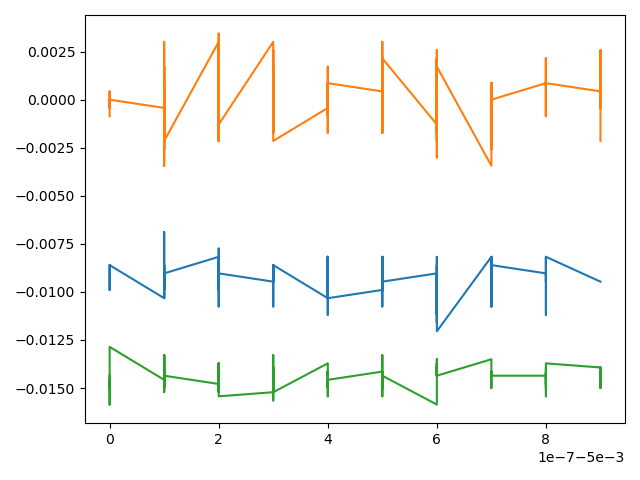

In [4]:
n = 90

plt.figure()
for i in range(1, 4):
    plt.plot(data[:n, 0], data[:n, i])
plt.tight_layout()

<IPython.core.display.Javascript object>


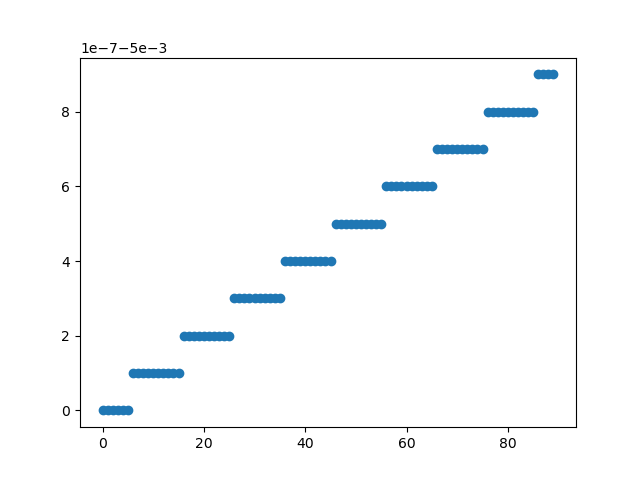

In [5]:
plt.figure()
plt.scatter(range(n), data[:n, 0])

In [6]:
import sys

ts = data[:, 0].copy()

d = np.argwhere(np.logical_not(np.isclose(np.diff(np.insert(data[:, 0], 0, -sys.maxsize)), 0.)))[:, 0]

for k, (i, j) in enumerate(zip(d[0:-1], d[1:])):
    ts[i:j] = np.linspace(ts[i], ts[j], j - i, endpoint=False)
    
    if not(k % (len(d) // 100)):
        print('\r{:.2f} %'.format((k + 1) / (len(d) - 1) * 100), flush=True, end='     ')
        
ts[d[-1]:] += (ts[1] - ts[0]) * np.arange(0, len(ts) - d[-1])

print('\r100.00 %')

100.00 %                                                                         


<IPython.core.display.Javascript object>


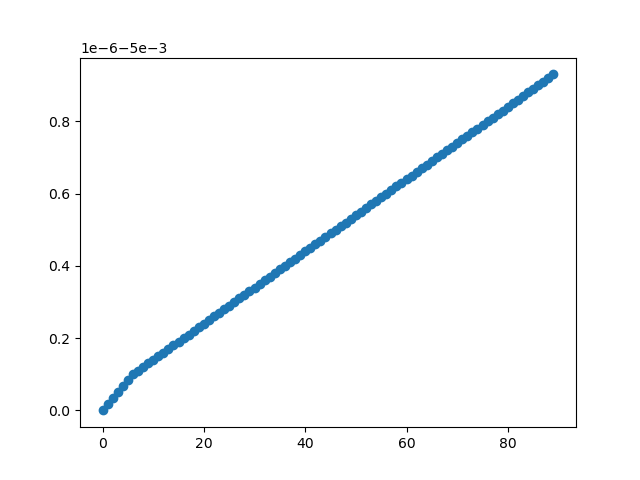

In [7]:
plt.figure()
plt.scatter(range(n), ts[:n])

<IPython.core.display.Javascript object>


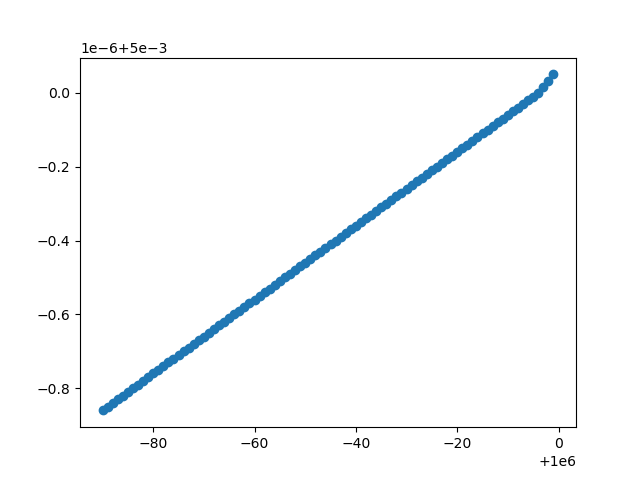

In [8]:
plt.figure()
plt.scatter(len(ts) - n + np.asarray(range(n)), ts[-n:])

In [9]:
import sys

ts = data[:, 0].copy()

d = np.argwhere(np.logical_not(np.isclose(np.diff(np.insert(data[:, 0], 0, -sys.maxsize)), 0.)))[:, 0]

avg_step = 0
for k, (i, j) in enumerate(zip(d[1:-1], d[2:])):
    ts[i:j] = np.linspace(ts[i], ts[j], j - i, endpoint=False)
    avg_step += ts[i + 1] - ts[i]
    
    if not(k % int(len(d) // 1000 + 1)):
        print('\r{:.2f} %'.format((k + 1) / (len(d) - 1) * 100), flush=True, end='     ')
        
avg_step /= len(d) - 1
ts[:d[1]] = ts[d[1]] + avg_step * np.arange(-d[1], 0)
ts[d[-1]:] = ts[d[-1]] + avg_step * np.arange(0, len(ts) - d[-1])

print('\r100.00 %')

100.00 %                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          


<IPython.core.display.Javascript object>


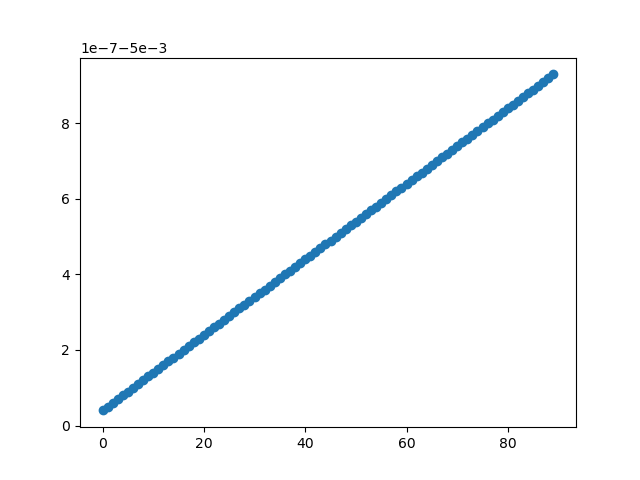

In [10]:
plt.figure()
plt.scatter(range(n), ts[:n])

<IPython.core.display.Javascript object>


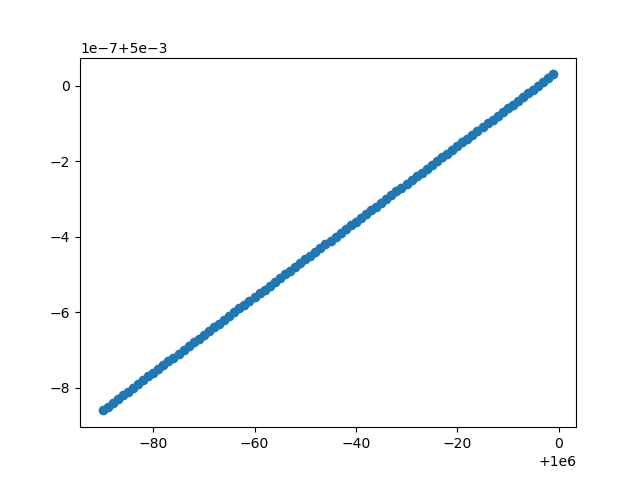

In [11]:
plt.figure()
plt.scatter(len(ts) - n + np.asarray(range(n)), ts[-n:])

<IPython.core.display.Javascript object>


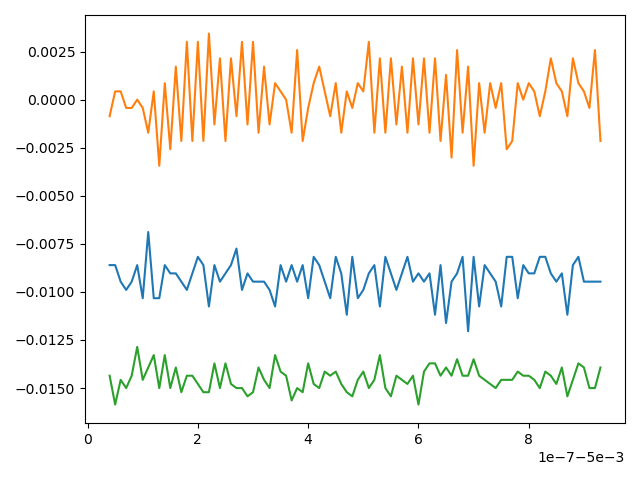

In [12]:
plt.figure()
for i in range(1, 4):
    plt.plot(ts[:n], data[:n, i])
plt.tight_layout()